In [843]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd  
import numpy as np
import scipy as sp 
import math 

In [844]:
kibergrad = pd.read_csv('Kibergrad.csv')

In [845]:
#print(nakljucni_vzorec_200.columns)

In [846]:

nakljucni_vzorec_200 = kibergrad.sample(n=200)
print(nakljucni_vzorec_200)

# Očisti imena stolpcev: odstrani dvojne enojne narekovaje in presledke
nakljucni_vzorec_200.columns = nakljucni_vzorec_200.columns.str.replace("'", "").str.strip()

# Filtriranje vrstic, kjer je izobrazba <= 38
stevilo_do_38 = nakljucni_vzorec_200[nakljucni_vzorec_200['IZOBRAZBA'] <= 38].shape[0]

# Izpis rezultata
print(f"Število oseb z izobrazbo največ 38: {stevilo_do_38}")
delez_brez_srednje = stevilo_do_38 / 200
print(f"Vzorčni delež oseb z izobrazbo največ 38: {delez_brez_srednje}")

       'TIP'  'CLANOV'  'OTROK'  'DOHODEK'  'CETRT'  'IZOBRAZBA'
1991       1         3        0      96200        1           43
9034       3         5        0      78600        1           40
3075       1         4        2      24500        1           39
14401      1         5        3      58260        2           43
42202      1         2        0      52699        4           39
...      ...       ...      ...        ...      ...          ...
2865       1         2        0      10112        1           40
5553       1         4        0     152000        1           43
8316       1         4        2      22878        1           39
9370       3         3        1      22000        1           39
25899      2         2        0      40000        3           39

[200 rows x 6 columns]
Število oseb z izobrazbo največ 38: 39
Vzorčni delež oseb z izobrazbo največ 38: 0.195


Uporabimo formulo za oceno standardne napake deleža:

$$\hat {SE} = \sqrt{\frac{\hat p (1- \hat p)}{n} \cdot \frac{N-n}{N-1}},$$

kjer je $\hat p$ vzorčni delež, $N$ velikost populacije in $n$ velikost vzorca. 
Faktor $\frac{N-n}{N-1}$ pod korenom je popravek za končne populacije.

 (Vir: John A. Rice: Mathematical Statistics and data analysis, 1995, razdelek 7.3.2, stran 199)

In [847]:
standardna_napaka =  math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (43886 -200) / (200 * 43885))
print(f"Ocenjena standardna napaka: {standardna_napaka}")

Ocenjena standardna napaka: 0.027952028947768933


Po istem viru kot prej, je interval zaupanja za vzorčni delež:

$$ \hat p \pm \Phi ^{-1}\left(1- \frac {\alpha}{2}\right)\sqrt{\frac{\hat p (1- \hat p)}{n} \cdot \frac{N-n}{N-1}},$$

kar pri stopnji zaupanja 95% da:

$$\hat p \pm 1.96 \sqrt{\frac{\hat p (1- \hat p)}{n} \cdot \frac{N-n}{N-1}}.$$

In [848]:
sp_meja = delez_brez_srednje - 1.96*standardna_napaka
zg_meja = delez_brez_srednje + 1.96*standardna_napaka

In [849]:
print((sp_meja, zg_meja))

(0.1402140232623729, 0.24978597673762712)


In [850]:

populacija = kibergrad.sample(n=43886)

populacija.columns = populacija.columns.str.replace("'", "").str.strip()

# Filtriranje vrstic, kjer je izobrazba <= 38
populacija_stevilo_do_38 = populacija[populacija['IZOBRAZBA'] <= 38].shape[0]
print(populacija_stevilo_do_38)

9282


In [851]:
delez = populacija_stevilo_do_38/43886
print(delez)

0.21150252928040833


Sedaj, ko poznamo pravi populacijski delež, pravo standardno napako izračunamo tako, da v formuli od prej vzorčni delež $\hat p$ zamenjamo s populacijskim deležem $p$:

$$ {SE} = \sqrt{\frac{ p (1-  p)}{n} \cdot \frac{N-n}{N-1}},$$

In [852]:
#Tako za pravo standardno napako dobimo:
standardna_napaka =  math.sqrt(delez * (1 - delez) * (43886 -200) / (200 * 43885))
print(f"Prava standardna napaka: {standardna_napaka}")

Prava standardna napaka: 0.028810847022556974


[np.float64(0.25), np.float64(0.215), np.float64(0.195), np.float64(0.215), np.float64(0.195), np.float64(0.22), np.float64(0.225), np.float64(0.245), np.float64(0.24), np.float64(0.195), np.float64(0.22), np.float64(0.19), np.float64(0.215), np.float64(0.21), np.float64(0.21), np.float64(0.235), np.float64(0.215), np.float64(0.225), np.float64(0.235), np.float64(0.235), np.float64(0.25), np.float64(0.2), np.float64(0.265), np.float64(0.2), np.float64(0.235), np.float64(0.175), np.float64(0.185), np.float64(0.21), np.float64(0.22), np.float64(0.2), np.float64(0.185), np.float64(0.205), np.float64(0.23), np.float64(0.235), np.float64(0.185), np.float64(0.215), np.float64(0.21), np.float64(0.205), np.float64(0.215), np.float64(0.205), np.float64(0.205), np.float64(0.185), np.float64(0.21), np.float64(0.23), np.float64(0.215), np.float64(0.17), np.float64(0.21), np.float64(0.235), np.float64(0.235), np.float64(0.17), np.float64(0.245), np.float64(0.225), np.float64(0.2), np.float64(0.22),

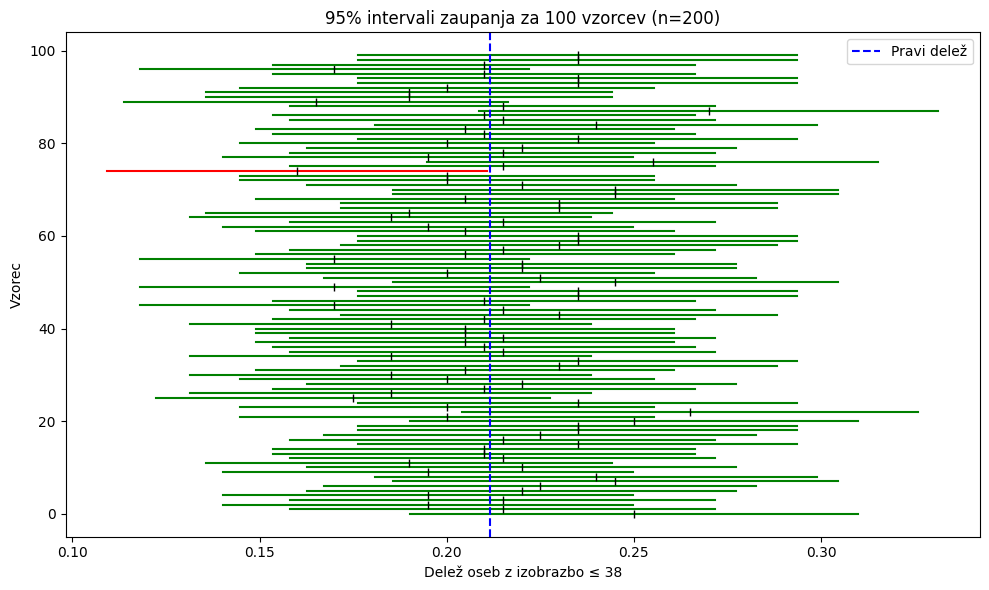

Število intervalov, ki zajamejo pravi delež: 99


In [853]:
import math
import matplotlib.pyplot as plt

intervali = []
zajeti = []
delezi =[]

n = 200
alpha = 0.05  # za 95% interval zaupanja

for i in range(100):  # 100 vzorcev
    vzorec = kibergrad.sample(n=n)
    vzorec.columns = vzorec.columns.str.replace("'", "").str.strip()
    
    # Preštej, koliko ima izobrazbo <= 38
    stevilo_do_38 = (vzorec['IZOBRAZBA'] <= 38).sum()
    delez_brez_srednje = stevilo_do_38 / n
    
    # Standardna napaka za delež
    standardna_napaka = math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (43886 - n) / (n * 43885))
    
    # Interval zaupanja (95%)
    levo = delez_brez_srednje - 1.96 * standardna_napaka
    desno = delez_brez_srednje + 1.96 * standardna_napaka
    
    # Dodaj interval in standard error (SE) v seznam
    intervali.append((levo, desno, delez_brez_srednje))
    
    # Preveri, če pravi delež (lahko uporabiš npr. povprečje celotnih podatkov) spada v interval
    # Tukaj bomo privzeli, da je prava vrednost povprečje celotnega podatka:
    prava_vrednost = (kibergrad['\'IZOBRAZBA\''] <= 38).mean()
    zajeti.append(levo <= prava_vrednost <= desno)
    delezi.append(delez_brez_srednje)
delezi.append(delez_brez_srednje)
print(delezi)

# Izris grafa
plt.figure(figsize=(10, 6))
for i, (levo, desno, SE) in enumerate(intervali):
    barva = 'green' if zajeti[i] else 'red'
    plt.plot([levo, desno], [i, i], color=barva)
    plt.plot(SE, i, 'k|', markersize=6)

plt.axvline(x=prava_vrednost, color='blue', linestyle='--', label='Pravi delež')
plt.xlabel('Delež oseb z izobrazbo ≤ 38')
plt.ylabel('Vzorec')
plt.title('95% intervali zaupanja za 100 vzorcev (n=200)')
plt.legend()
plt.tight_layout()
plt.show()

print("Število intervalov, ki zajamejo pravi delež:", sum(zajeti))


In [854]:
#Poračunamo standardni odklon:
std_odklon = np.std(delezi, ddof=1)

print(std_odklon)

0.022136167260618962


Še na 100 večjih vzorcih (800 družin)

[np.float64(0.1875), np.float64(0.2), np.float64(0.2), np.float64(0.20875), np.float64(0.20625), np.float64(0.2), np.float64(0.2025), np.float64(0.215), np.float64(0.18), np.float64(0.22), np.float64(0.2275), np.float64(0.2275), np.float64(0.215), np.float64(0.20875), np.float64(0.2175), np.float64(0.24125), np.float64(0.205), np.float64(0.21375), np.float64(0.19375), np.float64(0.21375), np.float64(0.2225), np.float64(0.1925), np.float64(0.1975), np.float64(0.2275), np.float64(0.20375), np.float64(0.21625), np.float64(0.24125), np.float64(0.19875), np.float64(0.17875), np.float64(0.215), np.float64(0.1775), np.float64(0.20125), np.float64(0.2225), np.float64(0.2325), np.float64(0.21125), np.float64(0.2325), np.float64(0.2325), np.float64(0.2175), np.float64(0.22), np.float64(0.22875), np.float64(0.21875), np.float64(0.20625), np.float64(0.205), np.float64(0.2075), np.float64(0.21375), np.float64(0.21375), np.float64(0.2075), np.float64(0.18), np.float64(0.20625), np.float64(0.2175), n

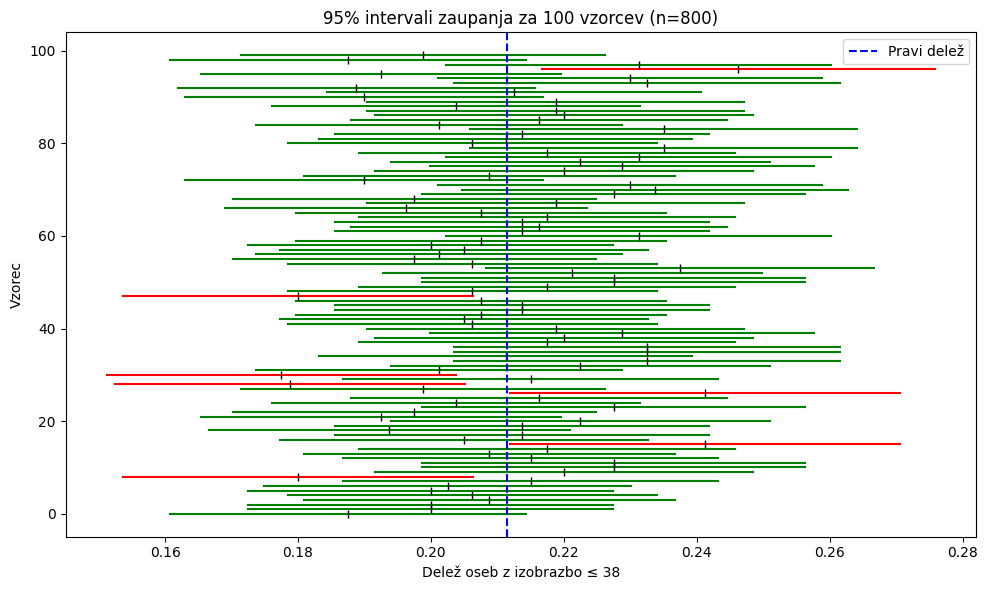

Število intervalov, ki zajamejo pravi delež: 93


In [855]:
intervali = []
zajeti = []
delezi =[]

n = 800
alpha = 0.05  # za 95% interval zaupanja

for i in range(100):  # 100 vzorcev
    vzorec = kibergrad.sample(n=n)
    vzorec.columns = vzorec.columns.str.replace("'", "").str.strip()
    
    # Preštej, koliko ima izobrazbo <= 38
    stevilo_do_38 = (vzorec['IZOBRAZBA'] <= 38).sum()
    delez_brez_srednje = stevilo_do_38 / n
    
    # Standardna napaka za delež
    standardna_napaka = math.sqrt(delez_brez_srednje * (1 - delez_brez_srednje) * (43886 - n) / (n * 43885))
    
    # Interval zaupanja (95%)
    levo = delez_brez_srednje - 1.96 * standardna_napaka
    desno = delez_brez_srednje + 1.96 * standardna_napaka
    
    # Dodaj interval in standard error (SE) v seznam
    intervali.append((levo, desno, delez_brez_srednje))
    
    # Preveri, če pravi delež (lahko uporabiš npr. povprečje celotnih podatkov) spada v interval
    # Tukaj bomo privzeli, da je prava vrednost povprečje celotnega podatka:
    prava_vrednost = (kibergrad['\'IZOBRAZBA\''] <= 38).mean()
    zajeti.append(levo <= prava_vrednost <= desno)
    delezi.append(delez_brez_srednje)
print(delezi)

# Izris grafa
plt.figure(figsize=(10, 6))
for i, (levo, desno, SE) in enumerate(intervali):
    barva = 'green' if zajeti[i] else 'red'
    plt.plot([levo, desno], [i, i], color=barva)
    plt.plot(SE, i, 'k|', markersize=6)

plt.axvline(x=prava_vrednost, color='blue', linestyle='--', label='Pravi delež')
plt.xlabel('Delež oseb z izobrazbo ≤ 38')
plt.ylabel('Vzorec')
plt.title('95% intervali zaupanja za 100 vzorcev (n=800)')
plt.legend()
plt.tight_layout()
plt.show()

print("Število intervalov, ki zajamejo pravi delež:", sum(zajeti))


In [856]:
#Poračunamo standardni odklon:
std_odklon = np.std(delezi, ddof=1)

print(std_odklon)

0.0150804816909243


In [857]:
#Prava standardna napaka za vzorec velikosti 800:
print(delez)
standardna_napaka =  math.sqrt(delez * (1 - delez) * (43886 - 800) / (800 * 43885))
print(f"Prava standardna napaka pri vzorcu velikosti 800: {standardna_napaka}")

0.21150252928040833
Prava standardna napaka pri vzorcu velikosti 800: 0.014306156731284972
